In [10]:
%matplotlib inline
import numpy as np
import json
import seaborn as sns
import pandas as pd
import os
import glob
import SimpleITK as itk
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
sns.set_style("whitegrid")
from src.utils import save_json, subfiles, join, maybe_mkdir_p, reconstruct_seg_df_from_json, reconstruct_calib_df_from_json, reconstruct_UED_df_from_json



# Part 1 - Ensemble Study

In [33]:

## directorys for main probability maps 
NNUNET_PMAPS="/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/prob_maps/Task901_AUH/imagesTs"
studies = [
join(NNUNET_PMAPS,'f0_tta')
,join(NNUNET_PMAPS,'f012_tta')
,join(NNUNET_PMAPS,'f01234_tta')
#,join(NNUNET_PMAPS,'f012456_tta')
,join(NNUNET_PMAPS,'f0123456_tta')
,join(NNUNET_PMAPS,'f012345678_tta')
,join(NNUNET_PMAPS,'f0123456789_tta')]


In [34]:
## directorys for main probability maps 
NNUNET_PMAPS="/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/prob_maps/Task901_AUH/imagesTs"
studies = [
join(NNUNET_PMAPS,'f0')
,join(NNUNET_PMAPS,'f012')
,join(NNUNET_PMAPS,'f01234')
#,join(NNUNET_PMAPS,'f012456')
,join(NNUNET_PMAPS,'f0123456')
,join(NNUNET_PMAPS,'f012345678')
,join(NNUNET_PMAPS,'f0123456789')]

In [35]:
def find_best_t(study):
    sum_path = os.path.join(study, 'uregion_summary.json')
    study_name = os.path.basename(study)
    best_GTV_T = 0
    best_GTV_N = 0

    best_GTV_T_s =None
    best_GTV_N_s =None

    with open(sum_path) as file:
        json_dict = json.load(file)
    for key in json_dict.keys():
        cur_t = (json_dict[key]['GTV-T']['UED'])
        cur_n = (json_dict[key]['GTV-N']['UED'])
        
        if best_GTV_T < cur_t:
            best_GTV_T = cur_t
            best_GTV_T_s = key

        if best_GTV_N < cur_n:
            best_GTV_N = cur_n
            best_GTV_N_s = key
    print(f'{study_name} - best GTVT S: {best_GTV_T_s}, UED: {best_GTV_T}, Best GTVN S: {best_GTV_N_s}, UED: {best_GTV_N}')
    bset_t_study = os.path.join(study,  str(best_GTV_T_s), 'GTV-T')
    bset_n_study = os.path.join(study, str(best_GTV_N_s), 'GTV-N')

    return bset_t_study, bset_n_study

In [36]:
groups = ['n=1','n=3','n=5','n=7','n=9','n=10']
for i, study in enumerate(studies):
    gtvt_calib, gtvn_calib  = reconstruct_calib_df_from_json(study)
    gtvt_seg, gtvn_seg  = reconstruct_seg_df_from_json(study)
    study = study.replace("prob_maps", "u_regions")

    best_t_gtvt_study, best_t_gtvn_study = find_best_t(study)
    gtvt_ued = reconstruct_UED_df_from_json(best_t_gtvt_study)
    gtvn_ued = reconstruct_UED_df_from_json(best_t_gtvn_study)

    df_seg_t = pd.DataFrame.from_dict(gtvt_seg).T
    df_seg_n = pd.DataFrame.from_dict(gtvn_seg).T
    df_cal_t = pd.DataFrame.from_dict(gtvt_calib).T
    df_cal_n = pd.DataFrame.from_dict(gtvn_calib).T
    df_ued_t = pd.DataFrame.from_dict(gtvt_ued).T
    df_ued_n = pd.DataFrame.from_dict(gtvn_ued).T

    dft = pd.concat([df_seg_t,df_cal_t,df_ued_t], axis = 1)
    dfn = pd.concat([df_seg_n,df_cal_n,df_ued_n], axis = 1)
    dft['Number of Ensemble Models'] = groups[i]
    dfn['Number of Ensemble Models'] = groups[i]
    dft.index.names = ['PatientID']
    dfn.index.names = ['PatientID']
    dft= dft.reset_index(drop=False)
    dfn= dfn.reset_index(drop=False)

    if i == 0:
        dft_all = dft
        dfn_all = dfn
    else:
        dft_all = pd.concat([dft_all, dft])
        dfn_all = pd.concat([dfn_all, dfn])



f0 - best GTVT S: 1, UED: 0.383, Best GTVN S: 1, UED: 0.359
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/u_regions/Task901_AUH/imagesTs/f0/1/GTV-T_union/summary.json
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/u_regions/Task901_AUH/imagesTs/f0/1/GTV-N_union/summary.json
f012 - best GTVT S: 2, UED: 0.375, Best GTVN S: 1, UED: 0.346
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/u_regions/Task901_AUH/imagesTs/f012/2/GTV-T_union/summary.json
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/u_regions/Task901_AUH/imagesTs/f012/1/GTV-N_union/summary.json
f01234 - best GTVT S: 2, UED: 0.365, Best GTVN S: 2, UED: 0.343
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/u_regions/Task901_AUH/imagesTs/f01234/2/GTV-T_union/summary.json
/data/jinta

In [37]:
dft_all

,PatientID,Accuracy,Mean Surface Distance (mm),DSC,False Discovery Rate,False Negative Rate,False Omission Rate,False Positive Rate,HD95 (mm),Jaccard,...,Surface Dice 2mm,Surface Dice 3mm,Volume (cc),Pred Volume (cc),True Negative Rate,GTV,Brier Score,Expected Calibration Error,UED,Number of Ensemble Models
0,HNCDL_003,0.999758,1.24046,0.6532,0.065676,0.49788,0.000226,0.000016,9.055385,0.485001,...,0.657509,0.779263,10.14,5.45,0.999984,GTV-T,0.467365,0.447214,0.390129,n=1
1,HNCDL_007,0.998592,3.638787,0.191519,0.388534,0.886459,0.001302,0.000106,26.048027,0.1059,...,0.256775,0.324427,24.42,4.54,0.999894,GTV-T,0.809448,0.793925,0.186812,n=1
2,HNCDL_010,0.999269,1.327175,0.737893,0.092912,0.378107,0.000626,0.000106,8.062258,0.584651,...,0.627828,0.735828,26.15,17.93,0.999894,GTV-T,0.375636,0.365086,0.429144,n=1
3,HNCDL_011,0.999125,1.892097,0.399718,0.057808,0.746333,0.000857,0.000018,11.18034,0.249779,...,0.331288,0.454013,17.86,4.81,0.999982,GTV-T,0.696520,0.693727,0.365670,n=1
4,HNCDL_034,0.99833,3.660566,0.813184,0.041149,0.29406,0.00152,0.000157,8.246211,0.685182,...,0.565611,0.699888,97.24,71.59,0.999843,GTV-T,0.264424,0.245168,0.498575,n=1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,HNCDL_868,0.998774,1.275131,0.841093,0.117132,0.196907,0.000799,0.000432,5.830952,0.725764,...,0.730235,0.846977,70.42,64.06,0.999568,GTV-T,0.200731,0.164732,0.430719,n=10
93,HNCDL_869,0.999595,1.92767,0.713215,0.300226,0.272818,0.000189,0.000216,5.167013,0.554261,...,0.740129,0.857595,11.06,11.49,0.999784,GTV-T,0.187820,0.088903,0.290303,n=10
94,HNCDL_876,0.999458,11.846659,0.854333,0.203672,0.078548,0.000136,0.000407,68.476273,0.745708,...,0.811785,0.878929,32.67,37.8,0.999593,GTV-T,0.140791,0.064642,0.306774,n=10
95,HNCDL_879,0.999625,1.355221,0.760964,0.192439,0.280549,0.000233,0.000142,5.385165,0.614158,...,0.731428,0.865469,14.13,12.59,0.999858,GTV-T,0.302882,0.268577,0.401073,n=10


In [38]:
sns.set(style="ticks")
all_data = pd.concat([dft_all, dfn_all])
all_data_ensemble= all_data.reset_index(drop=False)


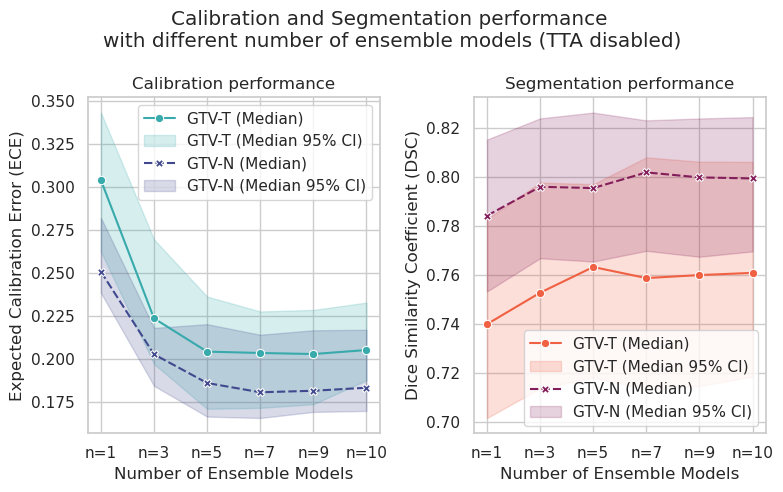

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=False)
sns.set_style("whitegrid")

fig.suptitle('Calibration and Segmentation performance \nwith different number of ensemble models (TTA disabled)')


exp= 'Expected Calibration Error'
sns.lineplot(ax = axes[0], x=all_data_ensemble["Number of Ensemble Models"], y=all_data_ensemble[exp].dropna(),  estimator='median', errorbar=('ci', 95), n_boot=10000, markers=True, style=all_data_ensemble["GTV"], hue =all_data_ensemble["GTV"], palette="mako_r").set(title=f'Calibration performance', ylabel='Expected Calibration Error (ECE)')

exp= 'DSC'
sns.lineplot(ax = axes[1], x=all_data_ensemble["Number of Ensemble Models"], y=all_data_ensemble[exp].dropna(), estimator='median',errorbar=('ci', 95), n_boot=10000, markers=True, style=all_data_ensemble["GTV"],hue =all_data_ensemble["GTV"], palette="rocket_r").set(title=f'Segmentation performance', ylabel='Dice Similarity Coefficient (DSC)')
# exp= 'UED'
# sns.lineplot(ax = axes[2], x=all_data["Number of Ensemble Models"], y=all_data[exp].dropna(), errorbar=('ci', 95), n_boot=1000, markers=True, style=all_data["GTV"], hue =all_data["GTV"], palette="mako_r").set(title=f'Number of models vs {exp}')
axes[0].legend(labels=["GTV-T (Median)","GTV-T (Median 95% CI)", "GTV-N (Median)","GTV-N (Median 95% CI)"])
axes[1].legend(labels=["GTV-T (Median)","GTV-T (Median 95% CI)", "GTV-N (Median)","GTV-N (Median 95% CI)"], loc='lower right')
fig.tight_layout()
fig.savefig('num_ensemble.svg')
plt.show()

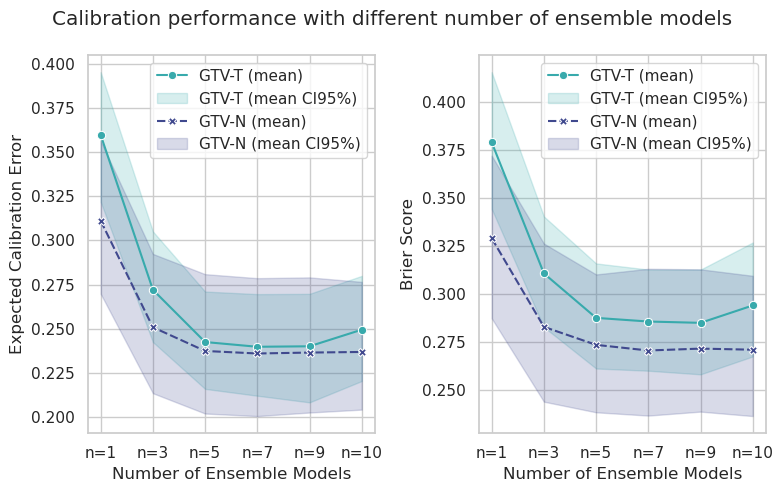

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=False)
fig.suptitle('Calibration performance with different number of ensemble models')
sns.set_style("whitegrid")
exp= 'Expected Calibration Error'
sns.lineplot(ax = axes[0], x=all_data_ensemble["Number of Ensemble Models"], y=all_data_ensemble[exp].dropna(), errorbar=('ci', 95), n_boot=1000, markers=True, style=all_data_ensemble["GTV"], hue =all_data_ensemble["GTV"], palette="mako_r")
exp= 'Brier Score'
sns.lineplot(ax = axes[1], x=all_data_ensemble["Number of Ensemble Models"], y=all_data_ensemble[exp].dropna(), errorbar=('ci', 95), n_boot=1000, markers=True, style=all_data_ensemble["GTV"], hue =all_data_ensemble["GTV"], palette="mako_r")

# exp= 'UED'
# sns.lineplot(ax = axes[2], x=all_data["Number of Ensemble Models"], y=all_data[exp].dropna(), errorbar=('ci', 95), n_boot=1000, markers=True, style=all_data["GTV"], hue =all_data["GTV"], palette="mako_r").set(title=f'Number of models vs {exp}')
axes[0].legend(labels=["GTV-T (mean)","GTV-T (mean CI95%)", "GTV-N (mean)","GTV-N (mean CI95%)"])
axes[1].legend(labels=["GTV-T (mean)","GTV-T (mean CI95%)", "GTV-N (mean)","GTV-N (mean CI95%)"])
fig.tight_layout()
plt.show()

# Part 2 - Monte Carlo Dropout Study

In [23]:
## directorys for main probability maps 
DROP1_PMAPS="/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout1__nnUNetPlansv2.1/prob_maps/Task901_AUH/imagesTs"
DROP2_PMAPS="/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout__nnUNetPlansv2.1/prob_maps/Task901_AUH/imagesTs"
DROP3_PMAPS="/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout3__nnUNetPlansv2.1/prob_maps/Task901_AUH/imagesTs"
DROP5_PMAPS="/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout5__nnUNetPlansv2.1/prob_maps/Task901_AUH/imagesTs"

studies = [
join(DROP1_PMAPS,'f0_mc10_tta')
,join(DROP2_PMAPS,'f0_mc10_tta')
,join(DROP3_PMAPS,'f0_mc10_tta')
,join(DROP5_PMAPS,'f0_mc10_tta')]

groups = ['p=0.1','p=0.2','p=0.3','p=0.5']
for i, study in enumerate(studies):
    gtvt_calib, gtvn_calib  = reconstruct_calib_df_from_json(study)
    gtvt_seg, gtvn_seg  = reconstruct_seg_df_from_json(study)
    study = study.replace("prob_maps", "u_regions")

    best_t_gtvt_study, best_t_gtvn_study = find_best_t(study)
    gtvt_ued = reconstruct_UED_df_from_json(best_t_gtvt_study)
    gtvn_ued = reconstruct_UED_df_from_json(best_t_gtvn_study)

    df_seg_t = pd.DataFrame.from_dict(gtvt_seg).T
    df_seg_n = pd.DataFrame.from_dict(gtvn_seg).T
    df_cal_t = pd.DataFrame.from_dict(gtvt_calib).T
    df_cal_n = pd.DataFrame.from_dict(gtvn_calib).T
    df_ued_t = pd.DataFrame.from_dict(gtvt_ued).T
    df_ued_n = pd.DataFrame.from_dict(gtvn_ued).T

    dft = pd.concat([df_seg_t,df_cal_t,df_ued_t], axis = 1)
    dfn = pd.concat([df_seg_n,df_cal_n,df_ued_n], axis = 1)
    dft['Dropout rate p'] = groups[i]
    dfn['Dropout rate p'] = groups[i]
    dft.index.names = ['PatientID']
    dfn.index.names = ['PatientID']
    dft= dft.reset_index(drop=False)
    dfn= dfn.reset_index(drop=False)

    if i == 0:
        dft_all = dft
        dfn_all = dfn
    else:
        dft_all = pd.concat([dft_all, dft])
        dfn_all = pd.concat([dfn_all, dfn])


all_data_mcdo = pd.concat([dft_all, dfn_all])
all_data_mcdo= all_data_mcdo.reset_index(drop=False)

f0_mc10_tta - best GTVT S: 2, UED: 0.366, Best GTVN S: 3, UED: 0.333
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout1__nnUNetPlansv2.1/u_regions/Task901_AUH/imagesTs/f0_mc10_tta/2/GTV-T_union/summary.json
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout1__nnUNetPlansv2.1/u_regions/Task901_AUH/imagesTs/f0_mc10_tta/3/GTV-N_union/summary.json
f0_mc10_tta - best GTVT S: 2, UED: 0.345, Best GTVN S: 3, UED: 0.322
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout__nnUNetPlansv2.1/u_regions/Task901_AUH/imagesTs/f0_mc10_tta/2/GTV-T_union/summary.json
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout__nnUNetPlansv2.1/u_regions/Task901_AUH/imagesTs/f0_mc10_tta/3/GTV-N_union/summary.json
f0_mc10_tta - best GTVT S: 2, UED: 0.343, Best GTVN S: 4, UED: 0.319
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropou

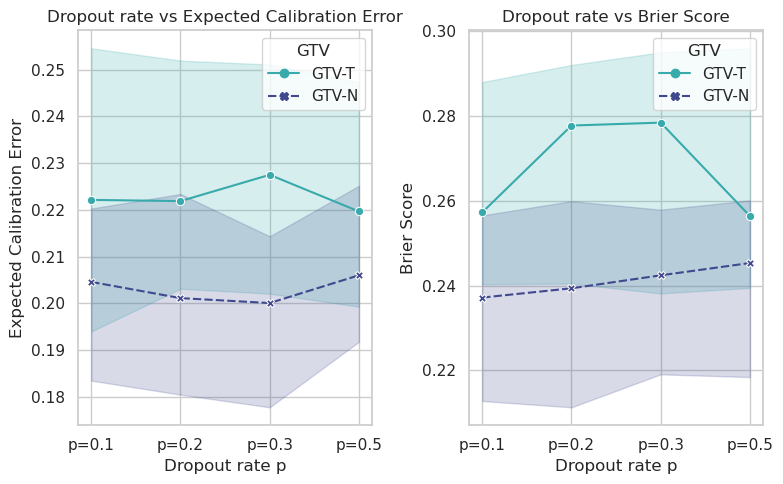

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=False)
sns.set_style("whitegrid")

exp= 'Expected Calibration Error'
sns.lineplot(ax = axes[0], x=all_data_mcdo["Dropout rate p"], y=all_data_mcdo[exp],  errorbar=('ci', 95), estimator = 'median', n_boot=10000,  markers=True, style=all_data_mcdo["GTV"],hue =all_data_mcdo["GTV"],  palette="mako_r").set(title=f'Dropout rate vs {exp}')
exp= 'Brier Score'
sns.lineplot(ax = axes[1], x=all_data_mcdo["Dropout rate p"], y=all_data_mcdo[exp], errorbar=('ci', 95), estimator = 'median',n_boot=10000, markers=True, style=all_data_mcdo["GTV"],  hue =all_data_mcdo["GTV"], palette="mako_r").set(title=f'Dropout rate vs {exp}')
# exp= 'UED'
# sns.lineplot(ax = axes[2], x=all_data_mcdo["Dropout rate p"], y=all_data_mcdo[exp], errorbar=('ci', 95), n_boot=1000,  markers=True, style=all_data_mcdo["GTV"], hue =all_data_mcdo["GTV"], palette="mako_r").set(title=f'Dropout rate vs {exp}', ylabel='Uncertainty-Error Overlap DSC (UED)')
# axes[0].legend(labels=["GTV-T (mean)","GTV-T (mean CI95%)", "GTV-N (mean)","GTV-N (mean CI95%)"])
# axes[1].legend(labels=["GTV-T (mean)","GTV-T (mean CI95%)", "GTV-N (mean)","GTV-N (mean CI95%)"])
# axes[2].legend(labels=["GTV-T (mean)","GTV-T (mean CI95%)", "GTV-N (mean)","GTV-N (mean CI95%)"])
fig.tight_layout()

plt.show()

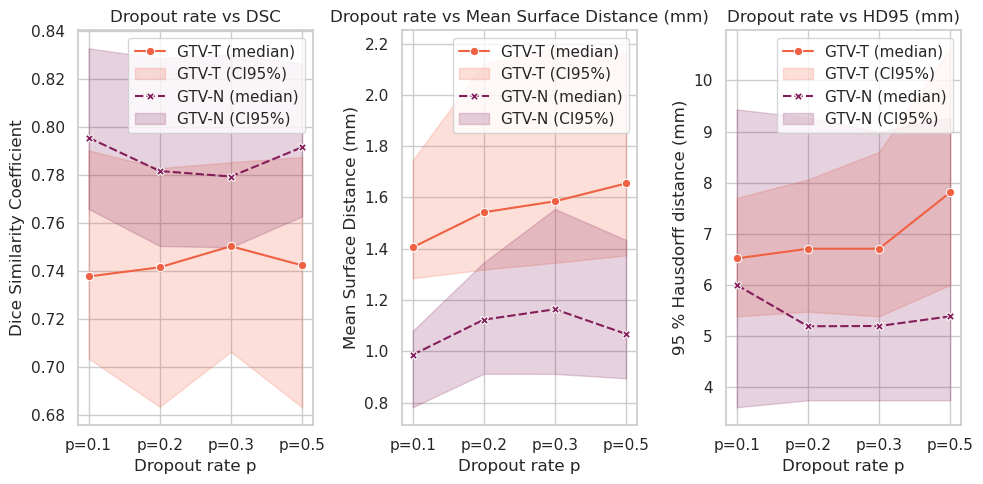

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=False)
sns.set_style("whitegrid")

exp= 'DSC'
#sns.lineplot(ax = axes[0], x=all_data_mcdo["Dropout rate p"], y=all_data_mcdo[exp].dropna(), errorbar=('ci', 95), n_boot=1000,  hue =all_data_mcdo["GTV"], palette="mako_r").set(title=f'Dropout rate vs {exp}', ylabel='Dice Similarity Coefficient')
sns.lineplot(ax = axes[0], x=all_data_mcdo["Dropout rate p"], y=all_data_mcdo[exp].dropna(), estimator='median', errorbar=('ci', 95),  n_boot=10000,  markers=True, style=all_data_mcdo["GTV"], hue =all_data_mcdo["GTV"], palette="rocket_r").set(title=f'Dropout rate vs {exp}', ylabel='Dice Similarity Coefficient')

exp= 'Mean Surface Distance (mm)'
sns.lineplot(ax = axes[1], x=all_data_mcdo["Dropout rate p"],y=all_data_mcdo[exp].dropna(),  estimator='median',errorbar=('ci', 95), n_boot=10000,  markers=True, style=all_data_mcdo["GTV"], hue =all_data_mcdo["GTV"], palette="rocket_r").set(title=f'Dropout rate vs {exp}')
exp= 'HD95 (mm)'
sns.lineplot(ax = axes[2], x=all_data_mcdo["Dropout rate p"], y=all_data_mcdo[exp].dropna(), estimator='median', errorbar=('ci', 95), n_boot=10000,  markers=True, style=all_data_mcdo["GTV"], hue =all_data_mcdo["GTV"], palette="rocket_r").set(title=f'Dropout rate vs {exp}', ylabel='95 % Hausdorff distance (mm)')
axes[0].legend(labels=["GTV-T (median)","GTV-T (CI95%)", "GTV-N (median)","GTV-N (CI95%)"])
axes[1].legend(labels=["GTV-T (median)","GTV-T (CI95%)", "GTV-N (median)","GTV-N (CI95%)"])
axes[2].legend(labels=["GTV-T (median)","GTV-T (CI95%)", "GTV-N (median)","GTV-N (CI95%)"])
fig.tight_layout()

plt.show()

## Dropout on differnet number of mc samples.

In [27]:
## directorys for main probability maps 
DROP2_PMAPS="/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout__nnUNetPlansv2.1/prob_maps/Task901_AUH/imagesTs"

studies = [
join(DROP2_PMAPS,'f0_mc1')
,join(DROP2_PMAPS,'f0_mc5')
,join(DROP2_PMAPS,'f0_mc10')
,join(DROP2_PMAPS,'f0_mc15')
,join(DROP2_PMAPS,'f0_mc20') 
,join(DROP2_PMAPS,'f0_mc30') ]
# ,join(DROP2_PMAPS,'f0_mc5_tta')
# ,join(DROP2_PMAPS,'f0_mc10_tta')
# ,join(DROP2_PMAPS,'f0_mc15_tta')]


groups = ['n=1','n=5','n=10','n=15','n=20','n=30']
for i, study in enumerate(studies):
    gtvt_calib, gtvn_calib  = reconstruct_calib_df_from_json(study)
    gtvt_seg, gtvn_seg  = reconstruct_seg_df_from_json(study)
    study = study.replace("prob_maps", "u_regions")

    best_t_gtvt_study, best_t_gtvn_study = find_best_t(study)
    gtvt_ued = reconstruct_UED_df_from_json(best_t_gtvt_study)
    gtvn_ued = reconstruct_UED_df_from_json(best_t_gtvn_study)

    df_seg_t = pd.DataFrame.from_dict(gtvt_seg).T
    df_seg_n = pd.DataFrame.from_dict(gtvn_seg).T
    df_cal_t = pd.DataFrame.from_dict(gtvt_calib).T
    df_cal_n = pd.DataFrame.from_dict(gtvn_calib).T
    df_ued_t = pd.DataFrame.from_dict(gtvt_ued).T
    df_ued_n = pd.DataFrame.from_dict(gtvn_ued).T

    dft = pd.concat([df_seg_t,df_cal_t,df_ued_t], axis = 1)
    dfn = pd.concat([df_seg_n,df_cal_n,df_ued_n], axis = 1)
    dft['Number of MC Dropout samples (n)'] = groups[i]
    dfn['Number of MC Dropout samples (n)'] = groups[i]
    dft.index.names = ['PatientID']
    dfn.index.names = ['PatientID']
    dft= dft.reset_index(drop=False)
    dfn= dfn.reset_index(drop=False)

    if i == 0:
        dft_all = dft
        dfn_all = dfn
    else:
        dft_all = pd.concat([dft_all, dft])
        dfn_all = pd.concat([dfn_all, dfn])


all_data_mcdo_n_tta = pd.concat([dft_all, dfn_all])
all_data_mcdo_n_tta= all_data_mcdo_n_tta.reset_index(drop=False)

f0_mc1 - best GTVT S: 1, UED: 0.407, Best GTVN S: 1, UED: 0.383
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout__nnUNetPlansv2.1/u_regions/Task901_AUH/imagesTs/f0_mc1/1/GTV-T_union/summary.json
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout__nnUNetPlansv2.1/u_regions/Task901_AUH/imagesTs/f0_mc1/1/GTV-N_union/summary.json
f0_mc5 - best GTVT S: 1, UED: 0.381, Best GTVN S: 1, UED: 0.344
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout__nnUNetPlansv2.1/u_regions/Task901_AUH/imagesTs/f0_mc5/1/GTV-T_union/summary.json
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout__nnUNetPlansv2.1/u_regions/Task901_AUH/imagesTs/f0_mc5/1/GTV-N_union/summary.json
f0_mc10 - best GTVT S: 1, UED: 0.373, Best GTVN S: 1, UED: 0.332
/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout__nnUNetPlansv2.1/u_regions/Task901

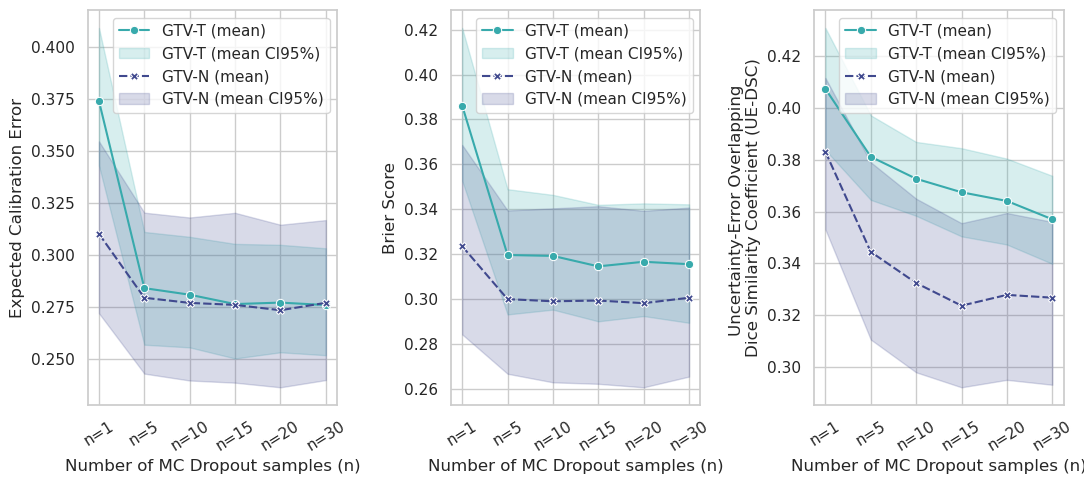

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(11, 5), sharey=False)
exp= 'Expected Calibration Error'
sns.lineplot(ax = axes[0], x=all_data_mcdo_n_tta["Number of MC Dropout samples (n)"], y=all_data_mcdo_n_tta[exp].dropna(),  errorbar=('ci', 95), n_boot=1000,  
markers=True, style=all_data_mcdo_n_tta["GTV"], hue =all_data_mcdo_n_tta["GTV"], palette="mako_r")#.set(title=f'Dropout samples vs {exp}')
exp= 'Brier Score'
sns.lineplot(ax = axes[1], x=all_data_mcdo_n_tta["Number of MC Dropout samples (n)"], y=all_data_mcdo_n_tta[exp].dropna(), errorbar=('ci', 95), n_boot=1000,  
markers=True, style=all_data_mcdo_n_tta["GTV"],  hue =all_data_mcdo_n_tta["GTV"], palette="mako_r")#.set(title=f'Dropout samples vs {exp}')
exp= 'UED'
sns.lineplot(ax = axes[2], x=all_data_mcdo_n_tta["Number of MC Dropout samples (n)"], y=all_data_mcdo_n_tta[exp].dropna(), errorbar=('ci', 95), n_boot=1000, 
 markers=True, style=all_data_mcdo_n_tta["GTV"],  hue =all_data_mcdo_n_tta["GTV"], palette="mako_r").set( ylabel='Uncertainty-Error Overlapping \nDice Similarity Coefficient (UE-DSC)')

axes[0].legend(labels=["GTV-T (mean)","GTV-T (mean CI95%)", "GTV-N (mean)","GTV-N (mean CI95%)"])
axes[0].tick_params(axis='x', rotation=32)
axes[1].legend(labels=["GTV-T (mean)","GTV-T (mean CI95%)", "GTV-N (mean)","GTV-N (mean CI95%)"])
axes[1].tick_params(axis='x', rotation=32)
axes[2].legend(labels=["GTV-T (mean)","GTV-T (mean CI95%)", "GTV-N (mean)","GTV-N (mean CI95%)"])
axes[2].tick_params(axis='x', rotation=32)
fig.tight_layout()

plt.show()

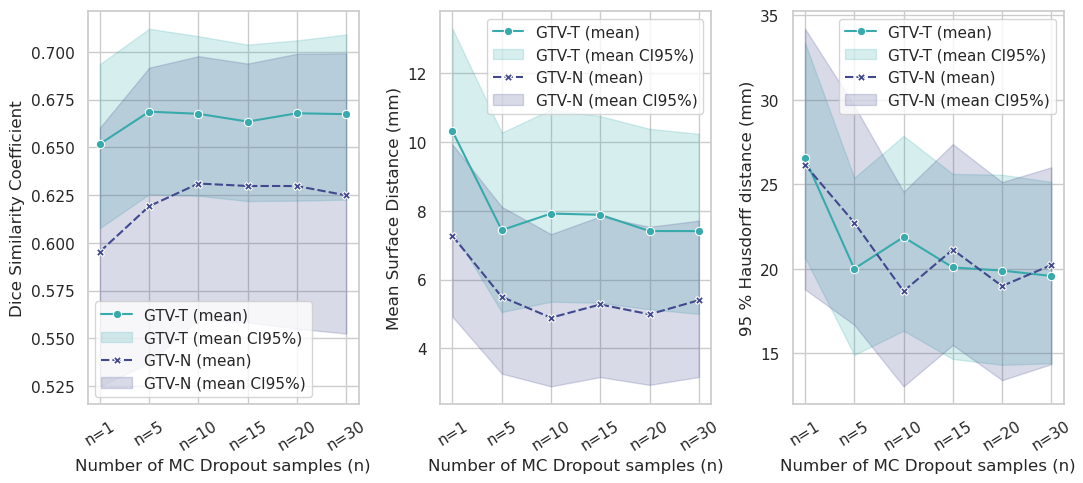

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(11, 5), sharey=False)
exp= 'DSC'
y_value = all_data_mcdo_n_tta[exp].astype({exp: float})
sns.lineplot(ax = axes[0], x=all_data_mcdo_n_tta["Number of MC Dropout samples (n)"], y=all_data_mcdo_n_tta[exp].dropna(),  estimator='mean',errorbar=('ci', 95), n_boot=1000,  
markers=True, style=all_data_mcdo_n_tta["GTV"],  hue =all_data_mcdo_n_tta["GTV"], palette="mako_r").set( ylabel='Dice Similarity Coefficient')
exp= 'Mean Surface Distance (mm)'
y_value = all_data_mcdo_n_tta[exp].astype({exp: float})
sns.lineplot(ax = axes[1], x=all_data_mcdo_n_tta["Number of MC Dropout samples (n)"], y=all_data_mcdo_n_tta[exp].dropna(),  estimator='mean',errorbar=('ci', 95), n_boot=1000,   
markers=True, style=all_data_mcdo_n_tta["GTV"], hue =all_data_mcdo_n_tta["GTV"], palette="mako_r")#.set(title=f'Monte carlo samples  vs {exp}')
exp= 'HD95 (mm)'
y_value = all_data_mcdo_n_tta[exp].astype({exp: float})
sns.lineplot(ax = axes[2], x=all_data_mcdo_n_tta["Number of MC Dropout samples (n)"], y=all_data_mcdo_n_tta[exp].dropna(),  estimator='mean',errorbar=('ci', 95), n_boot=1000,  
markers=True, style=all_data_mcdo_n_tta["GTV"],  hue =all_data_mcdo_n_tta["GTV"], palette="mako_r").set(ylabel='95 % Hausdorff distance (mm)')
axes[0].legend(labels=["GTV-T (mean)","GTV-T (mean CI95%)", "GTV-N (mean)","GTV-N (mean CI95%)"])
axes[0].tick_params(axis='x', rotation=32)
axes[1].legend(labels=["GTV-T (mean)","GTV-T (mean CI95%)", "GTV-N (mean)","GTV-N (mean CI95%)"])
axes[1].tick_params(axis='x', rotation=32)
axes[2].legend(labels=["GTV-T (mean)","GTV-T (mean CI95%)", "GTV-N (mean)","GTV-N (mean CI95%)"])
axes[2].tick_params(axis='x', rotation=32)
fig.tight_layout()

plt.show()

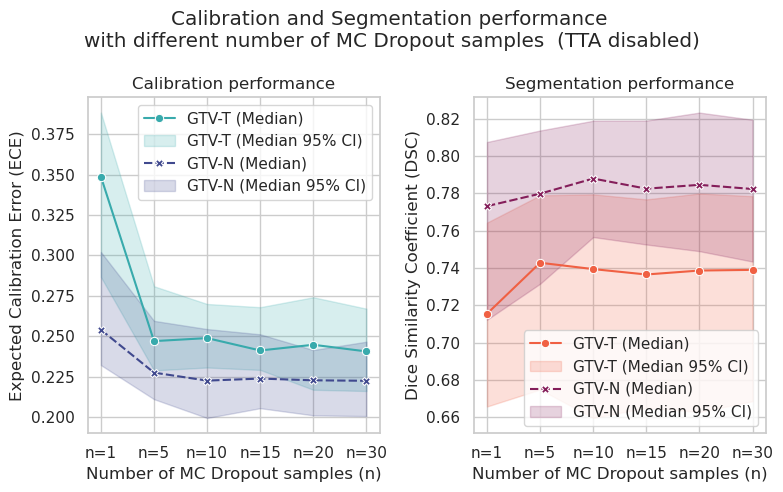

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=False)
sns.set_style("whitegrid")
sns.set_style("whitegrid")
fig.suptitle('Calibration and Segmentation performance \nwith different number of MC Dropout samples  (TTA disabled)')


exp= 'Expected Calibration Error'
sns.lineplot(ax = axes[0], x=all_data_mcdo_n_tta["Number of MC Dropout samples (n)"], y=all_data_mcdo_n_tta[exp].dropna(),  estimator='median', errorbar=('ci', 95), n_boot=10000, markers=True, style=all_data_ensemble["GTV"], hue =all_data_ensemble["GTV"], palette="mako_r").set(title=f'Calibration performance', ylabel='Expected Calibration Error (ECE)')

exp= 'DSC'
sns.lineplot(ax = axes[1], x=all_data_mcdo_n_tta["Number of MC Dropout samples (n)"], y=all_data_mcdo_n_tta[exp].dropna(), estimator='median',errorbar=('ci', 95), n_boot=10000, markers=True, style=all_data_ensemble["GTV"],hue =all_data_ensemble["GTV"], palette="rocket_r").set(title=f'Segmentation performance', ylabel='Dice Similarity Coefficient (DSC)')
# exp= 'UED'
# sns.lineplot(ax = axes[2], x=all_data["Number of Ensemble Models"], y=all_data[exp].dropna(), errorbar=('ci', 95), n_boot=1000, markers=True, style=all_data["GTV"], hue =all_data["GTV"], palette="mako_r").set(title=f'Number of models vs {exp}')
axes[0].legend(labels=["GTV-T (Median)","GTV-T (Median 95% CI)", "GTV-N (Median)","GTV-N (Median 95% CI)"])
axes[1].legend(labels=["GTV-T (Median)","GTV-T (Median 95% CI)", "GTV-N (Median)","GTV-N (Median 95% CI)"], loc='lower right')
fig.tight_layout()
fig.savefig('num_drop.svg')
plt.show()

# Correlation between uncertainty and segmentation

In [27]:
import SimpleITK as sitk
import numpy as np
from multiprocessing import Pool
from medpy.metric.binary import hd, asd
from scipy.ndimage import binary_erosion

def calcualte_target_entropy(arguments, only_seg_roi=False):
    
    umap_folder , seg_folder,  filename = arguments

    # create an dict for data storage

    seg_path = join(seg_folder, filename) 
    umap_path = join(umap_folder, filename.replace(".nii.gz", ".npz")) 
    pid = filename.replace(".nii.gz", "")
    
    
    seg = sitk.GetArrayFromImage(sitk.ReadImage(seg_path))
    umap = np.load(umap_path)['umap']

    resutl_list = []

    for target in range(1,3):

        entropy_results = {}
        entropy_results['PatientID'] = pid

        if target == 1:
            gtv = 'GTV-T'
            
        elif target == 2:
            gtv = 'GTV-N'

        # create an dict for each GTV
        entropy_results['GTV'] = gtv
    
        mask_seg = seg==target

        target_umap = umap[target]
        mask_umap = target_umap>0.9

        
        roi = mask_seg

        if not only_seg_roi:
            if np.sum(mask_seg) != 0:
                union_roi = (mask_seg + mask_umap)
                union_roi[union_roi>0] = 1
                roi = union_roi
        

        seg_entropy = target_umap * roi
        seg_entropy = seg_entropy[seg_entropy> 0] 



        if np.sum(mask_seg) == 0:
            # no segmentation made for this target (mostly GTV-N)
            entropy_results["Total Entropy"] = np.nan 
            entropy_results["Mean Entropy"] = np.nan 
            entropy_results["Entropy STD"] = np.nan 
            entropy_results["Entropy Volume"] = np.nan 
            entropy_results["Entropy Coefficient of Variation"] = np.nan 
            entropy_results["Logarithm Entropy Coefficient of Variation"] = np.nan 
            # entropy_results["Uncertainty-Segmentation Hausdorff distance"] = np.nan 
            # entropy_results["Uncertainty-Segmentation Mean Surface Distance"] = np.nan 

        else:
            # eros_seg  = binary_erosion(mask_seg, iterations=2).astype(int)
            # seg_line = mask_seg.astype(int) - eros_seg
            # e_hd  = hd(mask_umap, seg_line)
            # e_asd = asd(mask_umap, seg_line)
            entropy_mean = np.mean(seg_entropy) 
            entropy_std = np.std(seg_entropy) 
            entropy_results["Total Entropy"] = np.sum(seg_entropy)
            entropy_results["Mean Entropy"] = entropy_mean
            entropy_results["Entropy STD"] = entropy_std
            entropy_results["Entropy Volume"] = np.sum(roi) 
            entropy_results["Entropy Coefficient of Variation"] = entropy_std / (entropy_mean  + 1e-6) # + 1e-6 to avoid divide by 0
            entropy_results["Logarithm Entropy Coefficient of Variation"] = np.log(entropy_std / (entropy_mean  + 1e-6)) 
            # entropy_results["Uncertainty-Segmentation Hausdorff distance"] = e_hd
            # entropy_results["Uncertainty-Segmentation Mean Surface Distance"] = e_asd

        resutl_list.append(entropy_results)

    return resutl_list

Task = 'Baseline' #Complex #PhiSeg #External #Baseline
    ## complex
if Task == 'Complex':
    seg_folder = '/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout__nnUNetPlansv2.1/prob_maps/Task901_AUH/imagesTs/f01234_mc10_tta_snap'
    umap_folder =  '/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout__nnUNetPlansv2.1/umaps/Task901_AUH/imagesTs/f01234_mc10_tta_snap'
elif Task == 'PhiSeg':
    ## phiseg
    seg_folder = '/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_PhiSeg__nnUNetPlansv2.1/prob_maps/Task901_AUH/imagesTs/f01234_tta'
    umap_folder =  '/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_PhiSeg__nnUNetPlansv2.1/umaps/Task901_AUH/imagesTs/f01234_tta'
elif Task == 'Baseline':
    seg_folder = '/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/prob_maps/Task901_AUH/imagesTs/f0_tta'
    umap_folder =  '/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2__nnUNetPlansv2.1/umaps/Task901_AUH/imagesTs/f0_tta'

## external
# seg_folder = '/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout__nnUNetPlansv2.1/prob_maps/Task711_NKI_origin/imagesAll_ct_correct/f0_mc10_tta' #f01234_mc10_tta'
# umap_folder =  '/data/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task901_AUH/nnUNetTrainerV2_dropout__nnUNetPlansv2.1/umaps/Task711_NKI_origin/imagesAll_ct_correct/f0_mc10_tta' #f01234_mc10_tta'

seg_files_in = subfiles(seg_folder, suffix=".nii.gz", join=False) 
umaps = [umap_folder] * len(seg_files_in)
segs = [seg_folder] * len(seg_files_in)


p = Pool(128)
entropy_results=  p.map(calcualte_target_entropy, zip(umaps, segs, seg_files_in))
p.close()
p.join()




In [28]:
entropy_t = []
entropy_n = []
for result in entropy_results:
    entropy_t.append(result[0])
    entropy_n.append(result[1])
entropy_dft = pd.DataFrame(entropy_t)
entropy_dfn = pd.DataFrame(entropy_n)

entropy_df_all = pd.concat([entropy_dft, entropy_dfn], axis=0)
entropy_df_all = entropy_df_all.reset_index(drop=False)
entropy_df_all

,index,PatientID,GTV,Total Entropy,Mean Entropy,Entropy STD,Entropy Volume,Entropy Coefficient of Variation,Logarithm Entropy Coefficient of Variation
0,0,HNCDL_003,GTV-T,1652.0,0.293213,0.378662,6288.0,1.291419,0.255742
1,1,HNCDL_007,GTV-T,4244.0,0.541504,0.333496,7834.0,0.615869,-0.484721
2,2,HNCDL_010,GTV-T,3662.0,0.254639,0.368408,19771.0,1.446782,0.369342
3,3,HNCDL_011,GTV-T,2582.0,0.453613,0.430420,6640.0,0.948868,-0.052486
4,4,HNCDL_034,GTV-T,22368.0,0.263184,0.374268,86112.0,1.422073,0.352115
...,...,...,...,...,...,...,...,...,...
189,92,HNCDL_868,GTV-N,3044.0,0.167480,0.323242,20106.0,1.930018,0.657529
190,93,HNCDL_869,GTV-N,7220.0,0.208130,0.345459,43232.0,1.659816,0.506707
191,94,HNCDL_876,GTV-N,1053.0,0.615723,0.341064,1710.0,0.553925,-0.590727
192,95,HNCDL_879,GTV-N,2276.0,0.164307,0.313721,20237.0,1.909349,0.646763


In [29]:
complex_all_data = all_data[all_data["Ucertainty estimation methods"]==Task]

complex_all_data_entropy = pd.merge(complex_all_data, entropy_df_all, how="inner", on=["PatientID", "GTV"])

complex_all_data_entropy

,index_x,PatientID,Accuracy,Mean Surface Distance (mm),DSC,False Discovery Rate,False Negative Rate,False Omission Rate,False Positive Rate,HD95 (mm),...,Expected Calibration Error,UED,Ucertainty estimation methods,index_y,Total Entropy,Mean Entropy,Entropy STD,Entropy Volume,Entropy Coefficient of Variation,Logarithm Entropy Coefficient of Variation
0,0,HNCDL_003,0.999758,1.25737,0.653735,0.067908,0.496599,0.000225,0.000017,9.0,...,0.428311,0.401308,Baseline,0,1652.0,0.293213,0.378662,6288.0,1.291419,0.255742
1,1,HNCDL_007,0.99855,3.687023,0.208169,0.474557,0.870204,0.001278,0.000172,25.695329,...,0.759455,0.243105,Baseline,1,4244.0,0.541504,0.333496,7834.0,0.615869,-0.484721
2,2,HNCDL_010,0.999253,1.395519,0.731732,0.099083,0.383957,0.000636,0.000112,7.892907,...,0.346316,0.457091,Baseline,2,3662.0,0.254639,0.368408,19771.0,1.446782,0.369342
3,3,HNCDL_011,0.999138,1.596526,0.413178,0.054655,0.73564,0.000845,0.000018,14.623606,...,0.659354,0.501992,Baseline,3,2582.0,0.453613,0.430420,6640.0,0.948868,-0.052486
4,4,HNCDL_034,0.998455,2.524769,0.829682,0.040039,0.269462,0.001393,0.000158,7.681146,...,0.170991,0.435237,Baseline,4,22368.0,0.263184,0.374268,86112.0,1.422073,0.352115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,92,HNCDL_868,0.999303,1.069577,0.727354,0.118316,0.380996,0.000573,0.000125,22.409815,...,0.353316,0.375100,Baseline,92,3044.0,0.167480,0.323242,20106.0,1.930018,0.657529
190,93,HNCDL_869,0.998933,1.342849,0.812112,0.067133,0.280964,0.000903,0.000167,9.486833,...,0.239812,0.475923,Baseline,93,7220.0,0.208130,0.345459,43232.0,1.659816,0.506707
191,94,HNCDL_876,0.999937,40.91648,0.0,1.0,1.0,0.000001,0.000063,66.921222,...,NaN,0.445332,Baseline,94,1053.0,0.615723,0.341064,1710.0,0.553925,-0.590727
192,95,HNCDL_879,0.999708,0.882533,0.869419,0.1334,0.127744,0.000143,0.00015,2.44949,...,0.174116,0.388699,Baseline,95,2276.0,0.164307,0.313721,20237.0,1.909349,0.646763


In [30]:
plot_data = complex_all_data_entropy[["DSC", "Mean Entropy"]].astype({"DSC": float, "Mean Entropy": float})
plot_data = plot_data.dropna()
plot_data

,DSC,Mean Entropy
0,0.653735,0.293213
1,0.208169,0.541504
2,0.731732,0.254639
3,0.413178,0.453613
4,0.829682,0.263184
...,...,...
189,0.727354,0.167480
190,0.812112,0.208130
191,0.000000,0.615723
192,0.869419,0.164307


## Entropy inside segmentation to indicate segmentation error

In [31]:
import scipy 

def calcualte_corr(x, y, method = scipy.stats.spearmanr):
    # method could also be pearsonr
    nas = np.logical_or(np.isnan(x), np.isnan(y)) # remove nan
    r, p = method(x[~nas], y[~nas])
    ps = ''
    print(r,p) 
    if p< 0.05:
        ps = 'p-value<0.05'
    if p< 0.01:
        ps = 'p-value<0.01'    
    if p< 0.001:
        ps = 'p-value<0.001'
    if p< 0.0001:
        ps = 'p-value<0.001'
    if p> 0.05:
        ps = 'p-value='+str(p)
    return r, ps

# fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=False)
# sns.lmplot(data = plot_data, x=["Mean Entropy"], y=["DSC"], hue="GTV")

# ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
#             transform=ax.transAxes)
            
            

In [32]:
from medpy.metric.binary import ravd
complex_all_data_entropy['AVD (cc)'] = np.abs(complex_all_data_entropy['Pred Volume (cc)'] - complex_all_data_entropy['Volume (cc)'] )
complex_all_data_entropy['RAVD (cc)'] = ravd(complex_all_data_entropy['Pred Volume (cc)'] , complex_all_data_entropy['Volume (cc)'] )

entropy_plot_data = complex_all_data_entropy.astype({"Entropy Coefficient of Variation": float, 
                                                    "DSC": float,
                                                    "Mean Surface Distance (mm)": float,
                                                    "HD95 (mm)": float,
                                                    "Mean Entropy": float,
                                                    "Entropy STD": float, 
                                                    "Entropy Volume" : float,
                                                    "Pred Volume (cc)" : float,
                                                    "Volume (cc)" : float,
                                                    "RAVD (cc)" : float,
                                                    "Surface Dice 2mm" : float
                                                    }).dropna()



r00,p00 = calcualte_corr(entropy_plot_data['Mean Entropy'], entropy_plot_data['DSC'], method = scipy.stats.spearmanr)
r01,p01 = calcualte_corr(entropy_plot_data['Mean Entropy'], np.log(entropy_plot_data['HD95 (mm)']), method = scipy.stats.spearmanr)
r02,p02 = calcualte_corr(entropy_plot_data['Mean Entropy'], np.log(entropy_plot_data['Mean Surface Distance (mm)']), method = scipy.stats.spearmanr)
r03,p03 = calcualte_corr(entropy_plot_data['Mean Entropy'], entropy_plot_data['Surface Dice 2mm'], method = scipy.stats.spearmanr)

r10,p10 = calcualte_corr(entropy_plot_data['Logarithm Entropy Coefficient of Variation'], entropy_plot_data['DSC'], method = scipy.stats.spearmanr)
r11,p11 = calcualte_corr(entropy_plot_data['Logarithm Entropy Coefficient of Variation'], np.log(entropy_plot_data['HD95 (mm)']), method = scipy.stats.spearmanr)
r12,p12 = calcualte_corr(entropy_plot_data['Logarithm Entropy Coefficient of Variation'], np.log(entropy_plot_data['Mean Surface Distance (mm)']), method = scipy.stats.spearmanr)
r13,p13 = calcualte_corr(entropy_plot_data['Logarithm Entropy Coefficient of Variation'], entropy_plot_data['Surface Dice 2mm'], method = scipy.stats.spearmanr)

-0.8026271207191303 7.245279488100475e-39
0.48733201216152094 2.4091795165908814e-11
0.5015698010763898 5.036747755072269e-12
-0.5985704917868795 1.307747007315e-17
0.8084059292953785 8.071911401918404e-40
-0.4871755000489475 2.4500126710869943e-11
-0.4992682449215168 6.518751444640666e-12
0.597981999811316 1.4329525019942914e-17


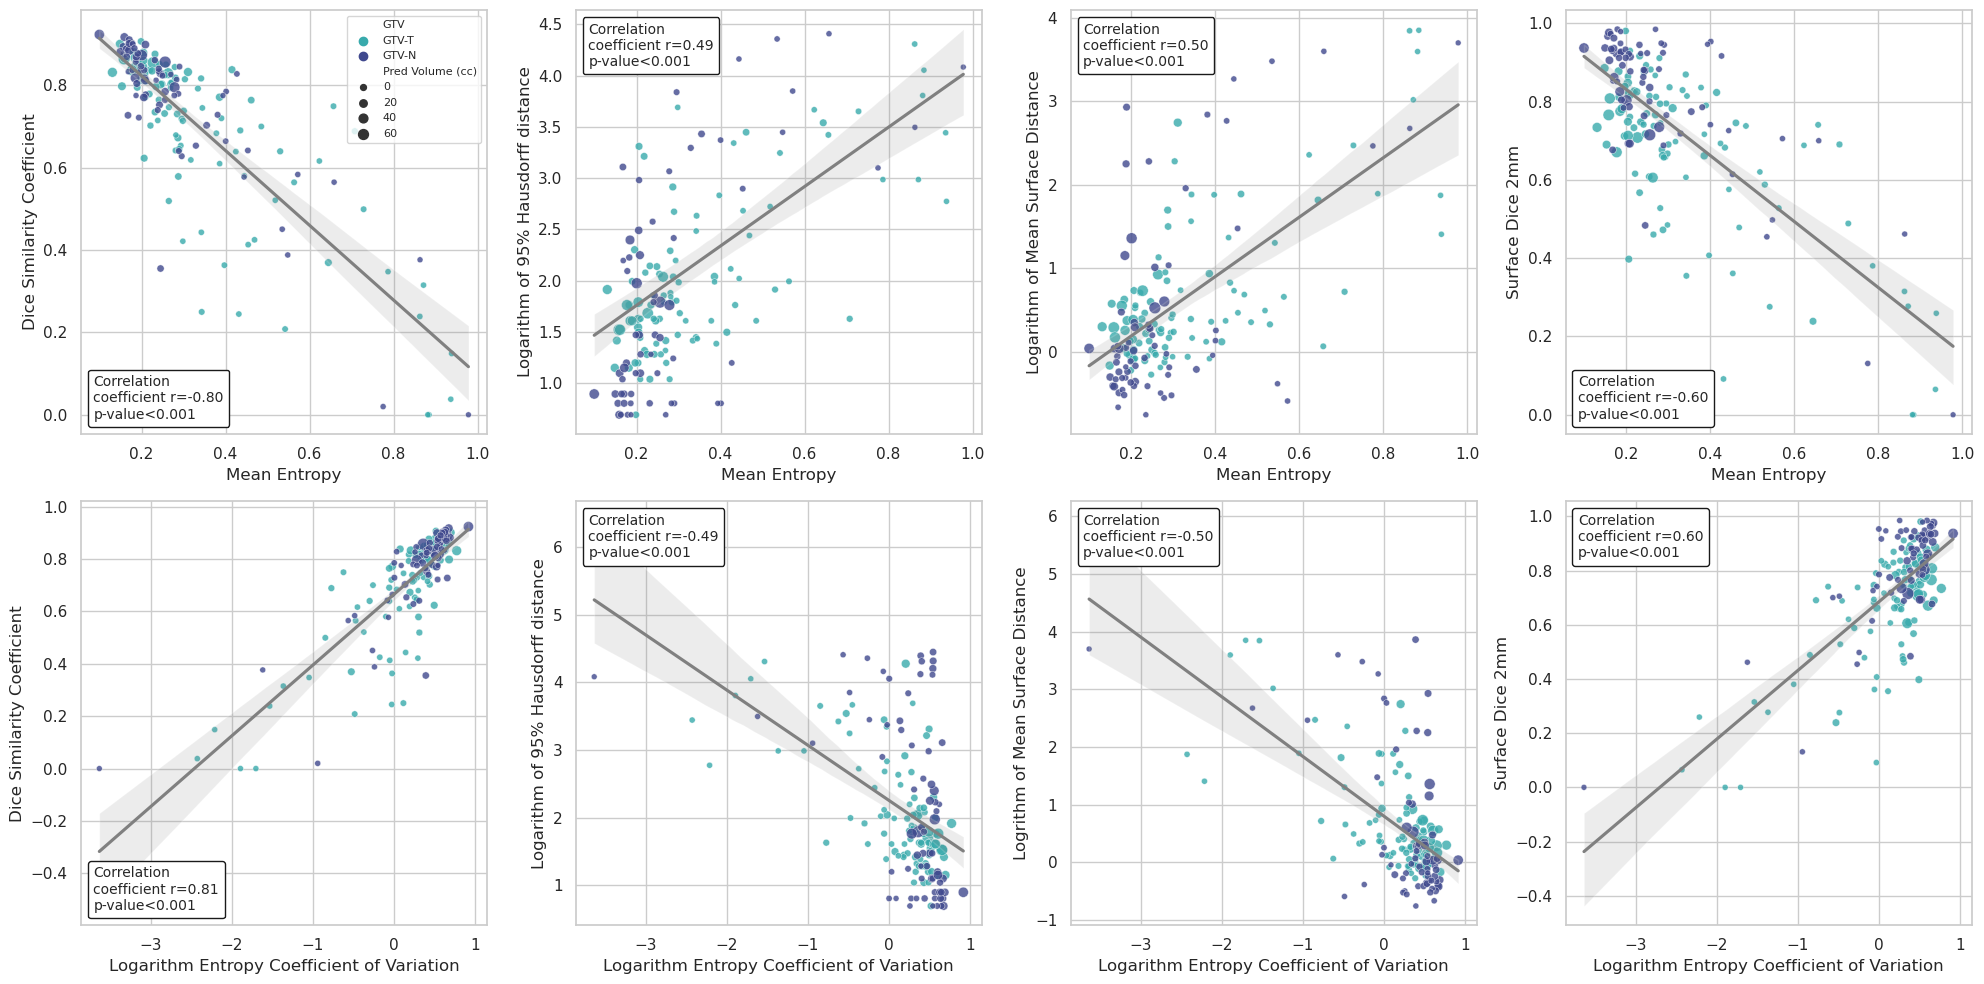

In [33]:
from matplotlib.offsetbox import AnchoredText

fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=False)
sns.set_style("whitegrid")
fig.tight_layout()
########## exp col 0
y_exp = entropy_plot_data['DSC']
x_exp = entropy_plot_data['Mean Entropy']
sns.scatterplot(ax = axes[0][0], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Pred Volume (cc)'], legend='auto', alpha=0.8).set( ylabel='Dice Similarity Coefficient')
sns.regplot(ax = axes[0][0], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Dice Similarity Coefficient')
at00 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r00,p00),
                  prop=dict(size=10), frameon=True,
                  loc='lower left',
                  )
at00.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[0][0].add_artist(at00)

y_exp = entropy_plot_data['DSC']
x_exp = entropy_plot_data['Logarithm Entropy Coefficient of Variation']

sns.scatterplot(ax = axes[1][0], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Pred Volume (cc)'], legend= False, alpha=0.8).set( ylabel='Dice Similarity Coefficient')
sns.regplot(ax = axes[1][0], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Dice Similarity Coefficient')
at10 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r10,p10),
                  prop=dict(size=10), frameon=True,
                  loc='lower left',
                  )
at10.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[1][0].add_artist(at10)

########## exp col 1
y_exp = np.log(entropy_plot_data['HD95 (mm)'])
x_exp = entropy_plot_data['Mean Entropy']
sns.scatterplot(ax = axes[0][1], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Pred Volume (cc)'], legend=False, alpha=0.8).set( ylabel='Logarithm of 95% Hausdorff distance')
sns.regplot(ax = axes[0][1], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Logarithm of 95% Hausdorff distance')
at01 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r01,p01),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at01.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[0][1].add_artist(at01)


y_exp = np.log(entropy_plot_data['HD95 (mm)'])
x_exp = entropy_plot_data['Logarithm Entropy Coefficient of Variation']

sns.scatterplot(ax = axes[1][1], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Pred Volume (cc)'], legend= False, alpha=0.8).set( ylabel='Logarithm of 95% Hausdorff distance')
sns.regplot(ax = axes[1][1], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Logarithm of 95% Hausdorff distance')
at11 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r11,p11),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at11.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[1][1].add_artist(at11)

########## exp col 2
y_exp = np.log(entropy_plot_data['Mean Surface Distance (mm)'])
x_exp = entropy_plot_data['Mean Entropy']

sns.scatterplot(ax = axes[0][2], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Pred Volume (cc)'], legend= False, alpha=0.8).set( ylabel='Logarithm of Mean Surface Distance')
sns.regplot(ax = axes[0][2], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Logarithm of Mean Surface Distance')
at02 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r02,p02),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at02.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[0][2].add_artist(at02)


y_exp = np.log(entropy_plot_data['Mean Surface Distance (mm)'])
x_exp = entropy_plot_data['Logarithm Entropy Coefficient of Variation']

sns.scatterplot(ax = axes[1][2], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Pred Volume (cc)'], legend= False, alpha=0.8).set( ylabel='Logrithm of Mean Surface Distance')
sns.regplot(ax = axes[1][2], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Logrithm of Mean Surface Distance')
at12 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r12,p12),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at12.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[1][2].add_artist(at12)


########## exp col 3
y_exp = entropy_plot_data['Surface Dice 2mm']
x_exp = entropy_plot_data['Mean Entropy']

sns.scatterplot(ax = axes[0][3], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Pred Volume (cc)'], legend= False, alpha=0.8)
sns.regplot(ax = axes[0][3], x = x_exp, y = y_exp , scatter =False, color = 'grey')
atr03 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r03,p03),
                  prop=dict(size=10), frameon=True,
                  loc='lower left',
                  )
atr03.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[0][3].add_artist(atr03)



y_exp = entropy_plot_data['Surface Dice 2mm']
x_exp = entropy_plot_data['Logarithm Entropy Coefficient of Variation']

sns.scatterplot(ax = axes[1][3], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Pred Volume (cc)'], legend= False, alpha=0.8)
sns.regplot(ax = axes[1][3], x = x_exp, y = y_exp , scatter =False, color = 'grey')
atr13 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r13,p13),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
atr13.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[1][3].add_artist(atr13)

# new_labels = ["GTVs regression","GTVs regression", "GTVs regression", "GTVs regression"]

ax00handles, ax00labels = axes[0][0].get_legend_handles_labels()
axes[0][0].legend(labels=ax00labels, handles =ax00handles[:-1], loc='upper right', fontsize=8)
fig.tight_layout()
#plt.setp(axes[0][0].get_legend().get_texts(), fontsize='8')


## plot with actual volume

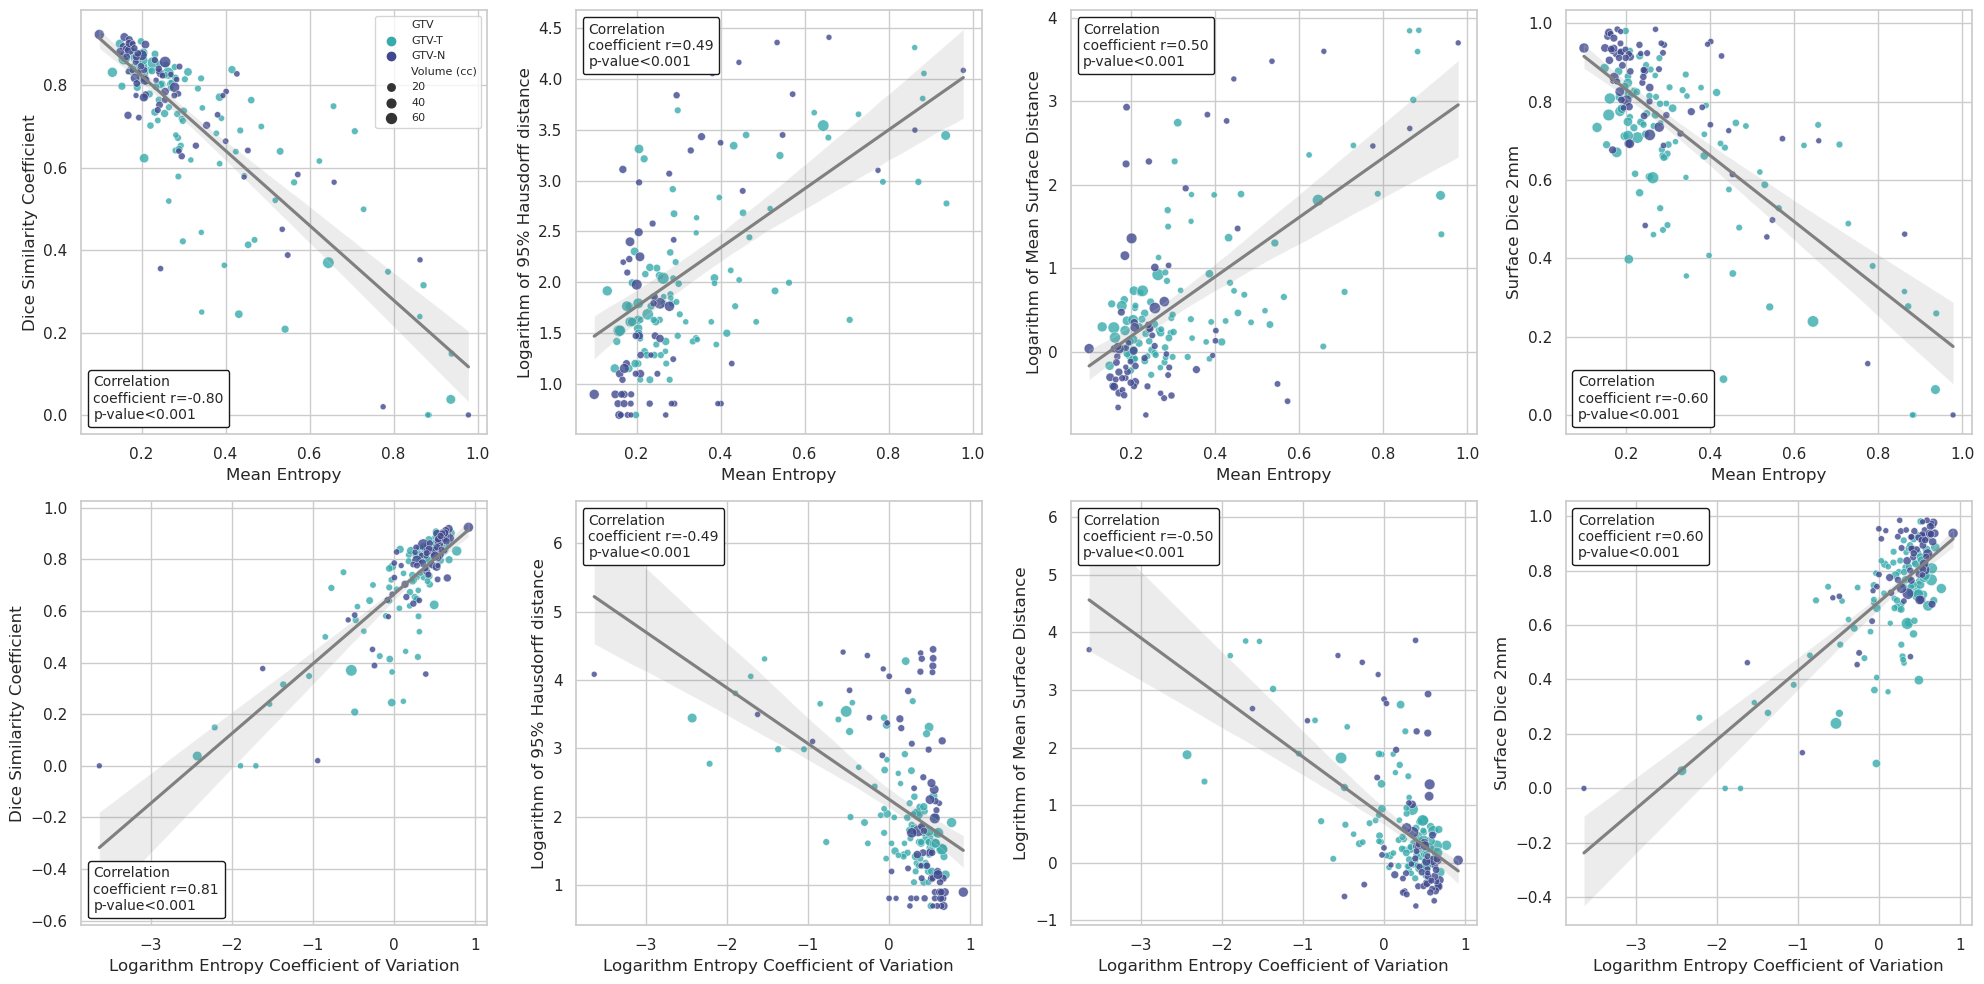

In [34]:
from matplotlib.offsetbox import AnchoredText

fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=False)
sns.set_style("whitegrid")
fig.tight_layout()
########## exp col 0
y_exp = entropy_plot_data['DSC']
x_exp = entropy_plot_data['Mean Entropy']
sns.scatterplot(ax = axes[0][0], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Volume (cc)'], legend='auto', alpha=0.8).set( ylabel='Dice Similarity Coefficient')
sns.regplot(ax = axes[0][0], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Dice Similarity Coefficient')
at00 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r00,p00),
                  prop=dict(size=10), frameon=True,
                  loc='lower left',
                  )
at00.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[0][0].add_artist(at00)

y_exp = entropy_plot_data['DSC']
x_exp = entropy_plot_data['Logarithm Entropy Coefficient of Variation']

sns.scatterplot(ax = axes[1][0], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Volume (cc)'], legend= False, alpha=0.8).set( ylabel='Dice Similarity Coefficient')
sns.regplot(ax = axes[1][0], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Dice Similarity Coefficient')
at10 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r10,p10),
                  prop=dict(size=10), frameon=True,
                  loc='lower left',
                  )
at10.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[1][0].add_artist(at10)

########## exp col 1
y_exp = np.log(entropy_plot_data['HD95 (mm)'])
x_exp = entropy_plot_data['Mean Entropy']
sns.scatterplot(ax = axes[0][1], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Volume (cc)'], legend=False, alpha=0.8).set( ylabel='Logarithm of 95% Hausdorff distance')
sns.regplot(ax = axes[0][1], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Logarithm of 95% Hausdorff distance')
at01 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r01,p01),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at01.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[0][1].add_artist(at01)


y_exp = np.log(entropy_plot_data['HD95 (mm)'])
x_exp = entropy_plot_data['Logarithm Entropy Coefficient of Variation']

sns.scatterplot(ax = axes[1][1], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Volume (cc)'], legend= False, alpha=0.8).set( ylabel='Logarithm of 95% Hausdorff distance')
sns.regplot(ax = axes[1][1], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Logarithm of 95% Hausdorff distance')
at11 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r11,p11),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at11.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[1][1].add_artist(at11)

########## exp col 2
y_exp = np.log(entropy_plot_data['Mean Surface Distance (mm)'])
x_exp = entropy_plot_data['Mean Entropy']

sns.scatterplot(ax = axes[0][2], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Volume (cc)'], legend= False, alpha=0.8).set( ylabel='Logarithm of Mean Surface Distance')
sns.regplot(ax = axes[0][2], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Logarithm of Mean Surface Distance')
at02 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r02,p02),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at02.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[0][2].add_artist(at02)


y_exp = np.log(entropy_plot_data['Mean Surface Distance (mm)'])
x_exp = entropy_plot_data['Logarithm Entropy Coefficient of Variation']

sns.scatterplot(ax = axes[1][2], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Volume (cc)'], legend= False, alpha=0.8).set( ylabel='Logrithm of Mean Surface Distance')
sns.regplot(ax = axes[1][2], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Logrithm of Mean Surface Distance')
at12 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r12,p12),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at12.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[1][2].add_artist(at12)


########## exp col 3
y_exp = entropy_plot_data['Surface Dice 2mm']
x_exp = entropy_plot_data['Mean Entropy']

sns.scatterplot(ax = axes[0][3], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Volume (cc)'], legend= False, alpha=0.8)
sns.regplot(ax = axes[0][3], x = x_exp, y = y_exp , scatter =False, color = 'grey')
atr03 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r03,p03),
                  prop=dict(size=10), frameon=True,
                  loc='lower left',
                  )
atr03.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[0][3].add_artist(atr03)



y_exp = entropy_plot_data['Surface Dice 2mm']
x_exp = entropy_plot_data['Logarithm Entropy Coefficient of Variation']

sns.scatterplot(ax = axes[1][3], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['Volume (cc)'], legend= False, alpha=0.8)
sns.regplot(ax = axes[1][3], x = x_exp, y = y_exp , scatter =False, color = 'grey')
atr13 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r13,p13),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
atr13.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[1][3].add_artist(atr13)

# new_labels = ["GTVs regression","GTVs regression", "GTVs regression", "GTVs regression"]

ax00handles, ax00labels = axes[0][0].get_legend_handles_labels()
axes[0][0].legend(labels=ax00labels, handles =ax00handles[:-1], loc='upper right', fontsize=8)
fig.tight_layout()
#plt.setp(axes[0][0].get_legend().get_texts(), fontsize='8')


## plot with AVD

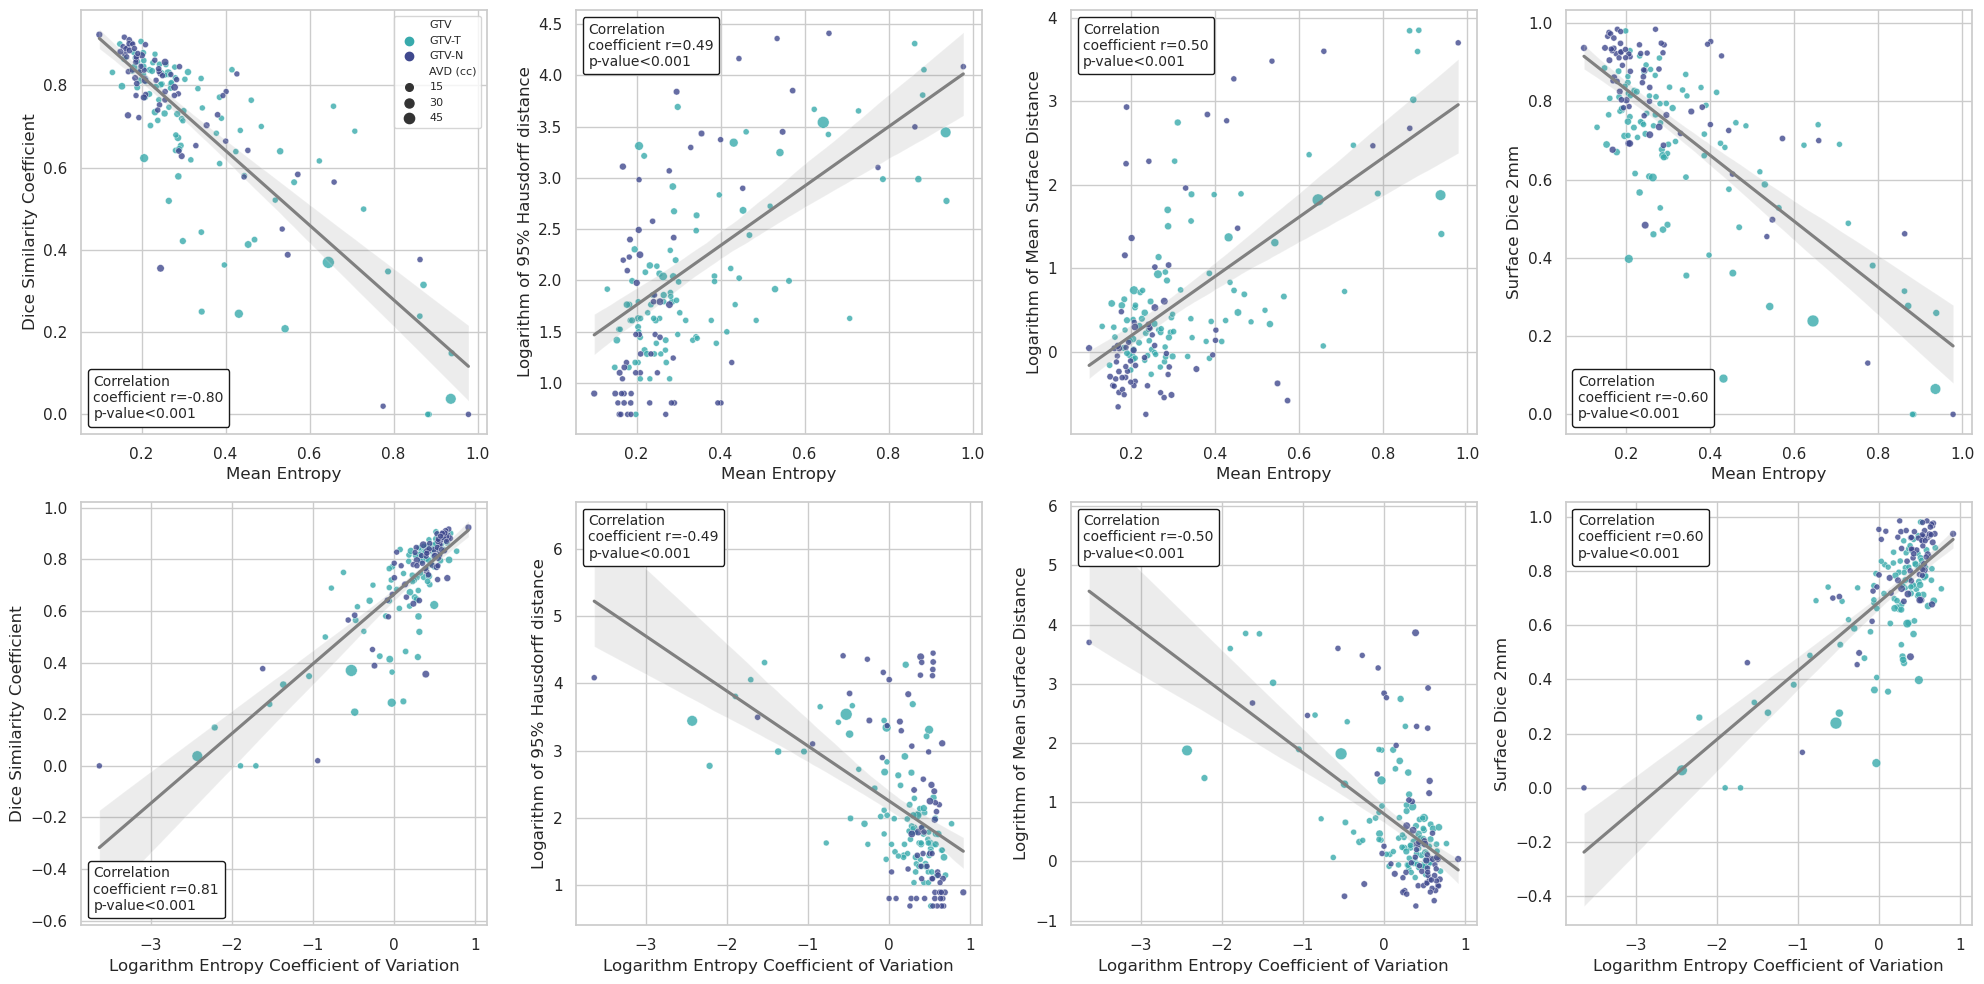

In [35]:
from matplotlib.offsetbox import AnchoredText

fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=False)
sns.set_style("whitegrid")
fig.tight_layout()
########## exp col 0
y_exp = entropy_plot_data['DSC']
x_exp = entropy_plot_data['Mean Entropy']
sns.scatterplot(ax = axes[0][0], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['AVD (cc)'], legend='auto', alpha=0.8).set( ylabel='Dice Similarity Coefficient')
sns.regplot(ax = axes[0][0], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Dice Similarity Coefficient')
at00 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r00,p00),
                  prop=dict(size=10), frameon=True,
                  loc='lower left',
                  )
at00.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[0][0].add_artist(at00)

y_exp = entropy_plot_data['DSC']
x_exp = entropy_plot_data['Logarithm Entropy Coefficient of Variation']

sns.scatterplot(ax = axes[1][0], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['AVD (cc)'], legend= False, alpha=0.8).set( ylabel='Dice Similarity Coefficient')
sns.regplot(ax = axes[1][0], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Dice Similarity Coefficient')
at10 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r10,p10),
                  prop=dict(size=10), frameon=True,
                  loc='lower left',
                  )
at10.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[1][0].add_artist(at10)

########## exp col 1
y_exp = np.log(entropy_plot_data['HD95 (mm)'])
x_exp = entropy_plot_data['Mean Entropy']
sns.scatterplot(ax = axes[0][1], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['AVD (cc)'], legend=False, alpha=0.8).set( ylabel='Logarithm of 95% Hausdorff distance')
sns.regplot(ax = axes[0][1], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Logarithm of 95% Hausdorff distance')
at01 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r01,p01),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at01.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[0][1].add_artist(at01)


y_exp = np.log(entropy_plot_data['HD95 (mm)'])
x_exp = entropy_plot_data['Logarithm Entropy Coefficient of Variation']

sns.scatterplot(ax = axes[1][1], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['AVD (cc)'], legend= False, alpha=0.8).set( ylabel='Logarithm of 95% Hausdorff distance')
sns.regplot(ax = axes[1][1], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Logarithm of 95% Hausdorff distance')
at11 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r11,p11),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at11.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[1][1].add_artist(at11)

########## exp col 2
y_exp = np.log(entropy_plot_data['Mean Surface Distance (mm)'])
x_exp = entropy_plot_data['Mean Entropy']

sns.scatterplot(ax = axes[0][2], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['AVD (cc)'], legend= False, alpha=0.8).set( ylabel='Logarithm of Mean Surface Distance')
sns.regplot(ax = axes[0][2], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Logarithm of Mean Surface Distance')
at02 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r02,p02),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at02.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[0][2].add_artist(at02)


y_exp = np.log(entropy_plot_data['Mean Surface Distance (mm)'])
x_exp = entropy_plot_data['Logarithm Entropy Coefficient of Variation']

sns.scatterplot(ax = axes[1][2], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['AVD (cc)'], legend= False, alpha=0.8).set( ylabel='Logrithm of Mean Surface Distance')
sns.regplot(ax = axes[1][2], x = x_exp, y = y_exp , scatter =False, color = 'grey').set( ylabel='Logrithm of Mean Surface Distance')
at12 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r12,p12),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at12.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[1][2].add_artist(at12)


########## exp col 3
y_exp = entropy_plot_data['Surface Dice 2mm']
x_exp = entropy_plot_data['Mean Entropy']

sns.scatterplot(ax = axes[0][3], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['AVD (cc)'], legend= False, alpha=0.8)
sns.regplot(ax = axes[0][3], x = x_exp, y = y_exp , scatter =False, color = 'grey')
atr03 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r03,p03),
                  prop=dict(size=10), frameon=True,
                  loc='lower left',
                  )
atr03.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[0][3].add_artist(atr03)



y_exp = entropy_plot_data['Surface Dice 2mm']
x_exp = entropy_plot_data['Logarithm Entropy Coefficient of Variation']

sns.scatterplot(ax = axes[1][3], x = x_exp, y = y_exp, hue = entropy_plot_data['GTV'],  
                palette="mako_r",  
                size = entropy_plot_data['AVD (cc)'], legend= False, alpha=0.8)
sns.regplot(ax = axes[1][3], x = x_exp, y = y_exp , scatter =False, color = 'grey')
atr13 = AnchoredText("Correlation\ncoefficient r=%.2f\n%s"%(r13,p13),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
atr13.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axes[1][3].add_artist(atr13)

# new_labels = ["GTVs regression","GTVs regression", "GTVs regression", "GTVs regression"]

ax00handles, ax00labels = axes[0][0].get_legend_handles_labels()
axes[0][0].legend(labels=ax00labels, handles =ax00handles[:-1], loc='upper right', fontsize=8)
fig.tight_layout()
#plt.setp(axes[0][0].get_legend().get_texts(), fontsize='8')
